# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
import numpy as np

In [2]:
# Read your api key environment variable
load_dotenv()

True

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [4]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

In [5]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(
    q="ethereum",
    language="en"
)

In [6]:
import nltk
nltk.download("vader_lexicon")
def get_sent(text):
    articles = [article["content"] for article in text]
    
    sent = {
        "Compound": [],
        "Negative": [],
        "Neutral": [],
        "Positive": [],
        "text": [],
    }
    for text in articles:
        try:        
            text_sentiment = analyzer.polarity_scores(text)
            sent["Compound"].append(text_sentiment["compound"])
            sent["Negative"].append(text_sentiment["neg"])
            sent["Neutral"].append(text_sentiment["neu"])
            sent["Positive"].append(text_sentiment["pos"])
            sent["text"].append(text)
            
        except AttributeError:
            pass
    df = pd.DataFrame(sent)
    return df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alhamduliallah/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = get_sent(bitcoin['articles'])
bitcoin_df = bitcoin_df.drop_duplicates().reset_index(drop=True)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_df = get_sent(ethereum['articles'])
ethereum_df = ethereum_df.drop_duplicates().reset_index(drop=True)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.4215,0.000,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
2,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...
3,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...
4,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.255311,0.017579,0.902526,0.079842
std,0.352664,0.035419,0.084095,0.075083
min,-0.585900,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.833500,0.000000
50%,0.202300,0.000000,0.897000,0.072000
75%,0.538650,0.000000,1.000000,0.150000
max,0.801600,0.103000,1.000000,0.209000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,16.000000,16.000000,16.000000,16.000000
mean,0.129900,0.010625,0.941063,0.048313
std,0.252508,0.029033,0.089574,0.082063
min,-0.128000,0.000000,0.682000,0.000000
25%,0.000000,0.000000,0.904750,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.195925,0.000000,1.000000,0.067000
max,0.877900,0.085000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive(0.079842). Vs. Ethereum(0.048313).

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score(0.877900) Vs. Bitcoin(0.801600)

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score(0.318000). Vs Bitcoin(0.209000)

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import string
import re

In [12]:
# Expand the default stopwords list if necessary
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alhamduliallah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    lemmatizer = WordNetLemmatizer()
    """Tokenizes text.""" 
# Create a list of the words
        
    tokens=[]
    for i in text:
        regex = re.compile("[^a-zA-Z- ]")
        re_clean = regex.sub(' ', i)
        words = word_tokenize(re_clean)
# Convert the words to lowercase
        output = [word.lower() for word in words]
# Remove the punctuation
        exclude = set(string.punctuation)
# Remove the stop words
        sw = set(stopwords.words('english')).union(exclude,{"file","photo","representation", "london", "reuters", "new york","char","dado","ruvic","chars","illustration","image","copyrightgetty","youve"}) 
# Lemmatize Words into root words
        lem = [lemmatizer.lemmatize(word) for word in output if word not in sw]

        tokens.append(lem)

    return tokens


In [14]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens']=tokenizer(bitcoin_df['text'])
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visa, partnered, cryptocurrency, startup, blo..."
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, all-time, high, november,..."
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, year, day, since, price, bitco..."
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,"[everything, dumb, work, come, close, cryptocu..."
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, two-month, ral..."


In [15]:
# Create a new tokens column for ethereum
ethereum_df['tokens']=tokenizer(ethereum_df['text'])
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[ethereum, virtual, currency, standing, pc, mo..."
1,0.4215,0.000,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[digital, currency, ethereum, xrp, soared, mon..."
2,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...,"[bitcoin, derided, serious, investor, bubble, ..."
3,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[virtual, currency, bitcoin, seen, front, stoc..."
4,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[representation, virtual, currency, bitcoin, s..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
def join(text):
    lis = []
    for i in text:
        for x in i:
            lis.append(x)
    return lis

In [18]:
# Generate the Bitcoin N-grams where N=2
bitcoin_gram=Counter(ngrams(join(bitcoin_df['tokens']),n=2))


In [19]:
# Generate the Ethereum N-grams where N=2
ethereum_gram=Counter(ngrams(join(ethereum_df['tokens']),n=2))

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_gram)

[(('virtual', 'currency'), 4),
 (('all-time', 'high'), 3),
 (('year', 'day'), 2),
 (('new', 'all-time'), 2),
 (('seen', 'taken'), 2),
 (('staff', 'virtual'), 2),
 (('currency', 'bitcoin'), 2),
 (('bitcoin', 'seen'), 2),
 (('taken', 'november'), 2),
 (('visa', 'partnered'), 1)]

In [22]:
# Get the top 10 words for Ethereum
token_count(ethereum_gram)

[(('virtual', 'currency'), 9),
 (('currency', 'bitcoin'), 8),
 (('bitcoin', 'seen'), 6),
 (('taken', 'november'), 5),
 (('new', 'york'), 4),
 (('staff', 'virtual'), 4),
 (('november', 'new'), 3),
 (('seen', 'taken'), 3),
 (('ethereum', 'virtual'), 2),
 (('seen', 'picture'), 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

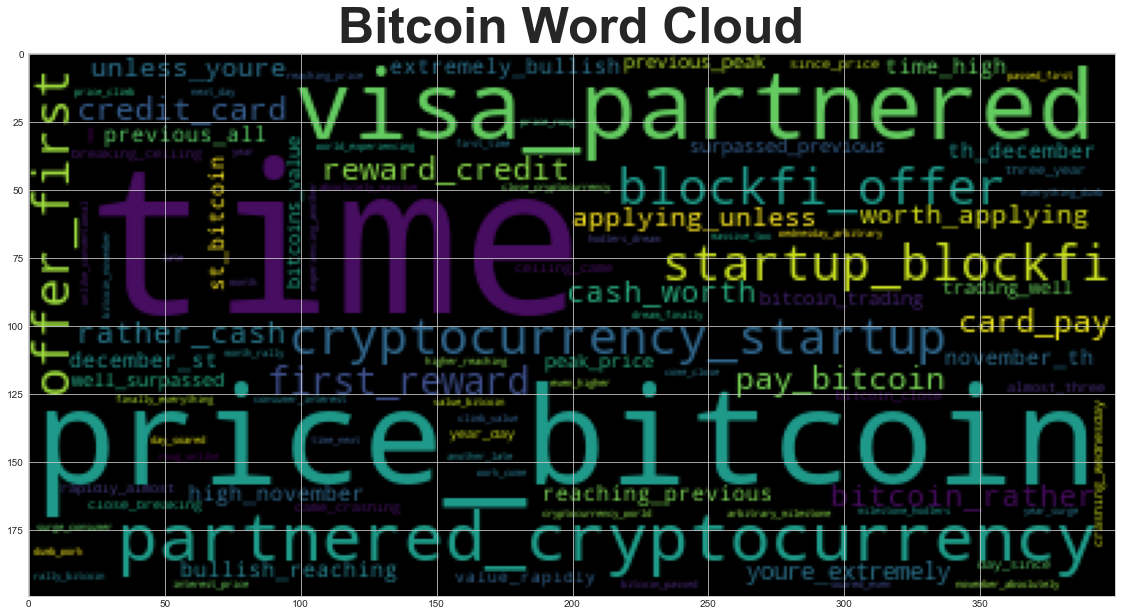

In [24]:
# Generate the Bitcoin word cloud
output = ['_'.join(i) for i in bitcoin_gram]
out = ' '.join(output)
wc = WordCloud().generate(out)
plt.title('Bitcoin Word Cloud',fontsize=50,fontweight='bold')
plt.imshow(wc)

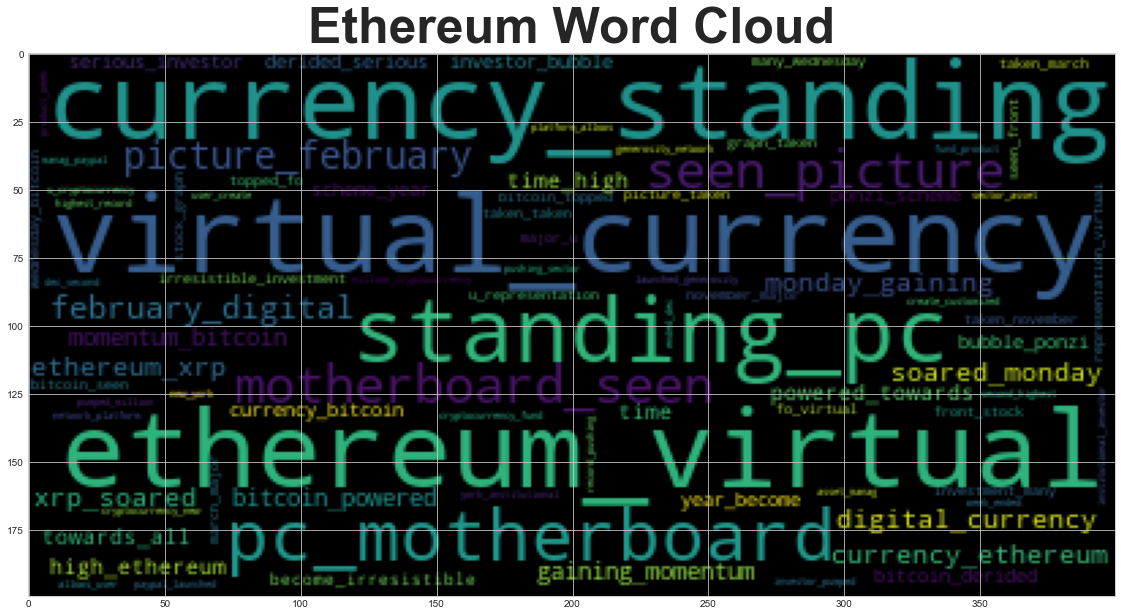

In [25]:
# Generate the Ethereum word cloud
output = ['_'.join(i) for i in ethereum_gram]
out = ' '.join(output)
wc = WordCloud().generate(out)
plt.title('Ethereum Word Cloud',fontsize=50,fontweight='bold')
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
all_bitcoin_text = ' '.join([i for i in bitcoin_df['text']])

In [30]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(all_bitcoin_text)


# Add a title to the document
bitcoin_doc.user_data['title']='Bitcoin NER'

In [31]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent', jupyter=True)

In [32]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text,ent.label_)

Visa ORG
first ORDINAL
Bitcoin GPE
November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
2020 DATE
late-year DATE
Bitcoin GPE
over $23,000 MONEY
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Bitcoin GPE
20,000 MONEY
14,800 MONEY
more than 170% PERCENT
this year DATE
Six years DATE
Mexico GPE
$62 million MONEY
Decentralized GPE
4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Grayson Blackmon / PERSON
the year DATE
the day DATE
Twitter ORG
6 CARDINAL
6 CARDINAL
one CARDINAL
above $20,000 MONEY
Wednesday DATE
a year DATE
Reuters ORG
Bitcoin GPE
U.S. GPE
January 6, 2020 DATE
REUTERS/ ORG
Dado Ruvic/File Photo ORG
LONDON GPE
Reuters ORG
B

---

## Ethereum NER

In [33]:
# Concatenate all of the bitcoin text together
all_ethereum_text = ' '.join([i for i in ethereum_df['text']])
all_ethereum_text

"FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars] Bitcoin was once derided by serious investors as a bubble or a Ponzi scheme. But this year, it has become an irresistible investment for many of them.\xa0\r\nJust this Wednesday, bitcoin topped $20,000 fo… [+5208 chars] FILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - Major U.S.… [+1046 chars] FILE PHOTO: Representations of virtual currency Bitcoin are seen in this picture illustration taken taken March 13, 2020. REUTER

In [34]:
# Run the NER processor on all of the text
ethereum_doc = nlp(all_ethereum_text)


# Add a title to the document
ethereum_doc.user_data['title']='Ethereum NER'

In [35]:
# Render the visualization
displacy.render(ethereum_doc, style='ent', jupyter=True)

In [36]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text,ent.label_)

February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
Bitcoin GPE
this year DATE
Wednesday DATE
bitcoin GPE
20,000 MONEY
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
NEW YORK GPE
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
PayPal PERSON
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
The New York Times ORG
Coinbase ORG
December DATE
15 DATE
2020 DATE
6 min QUANTITY
A few days ago DATE
US GPE
Cynthia Lummis PERSON
Bitcoin GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Bitcoin GPE
the Plug and Play Tech Center ORG
Sun